# Solution by Nelson Niemeyer & Johannes Rieke

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
from scipy import integrate, arange

### 2. Numerical solutions to ODEs

###### a.) define function that takes f(x,t), initial condition, stop time and integration step

In [2]:
def logistic(x,t):
    return x*(1-x)

In [3]:
def euler(f_func, x0, t_max, dt):
    #dt is the integration step
    # x_0 is the initial condition
    x=x0
    t=0
    
    p0=[t]
    p1=[x0]
    for i in range(0,int(t_max/dt),1):
        x=x+dt*f_func(x,t)
        t+=dt
        p0.append(t)
        p1.append(x)
    return p0,p1

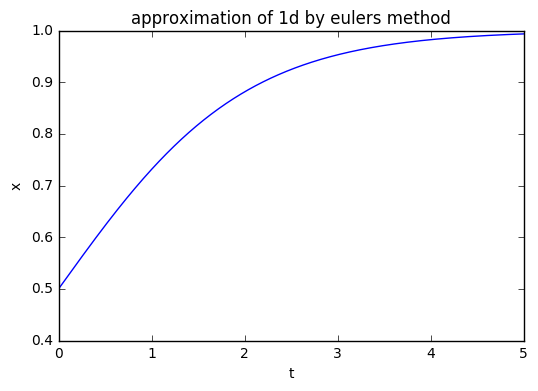

In [4]:
#example for 1d approximation...
p0,p1=euler(logistic,0.5,5,0.01)
plt.plot(p0,p1)
plt.xlabel('t')
plt.ylabel('x')
plt.title('approximation of 1d by eulers method')

###### b.) plot and compare

In [5]:
def a(x,t): #ODE from exersice 1a
    return -x

def a2(t): #analytical solution to exercise 1a
    return np.e**(-t)

def b(x,t):
    return 1/x

def b2(t):
    return (2*t+1)**0.5
      
def c(x,t):
    return 1-x

def c2(t):
    return 1-np.e**(-t)

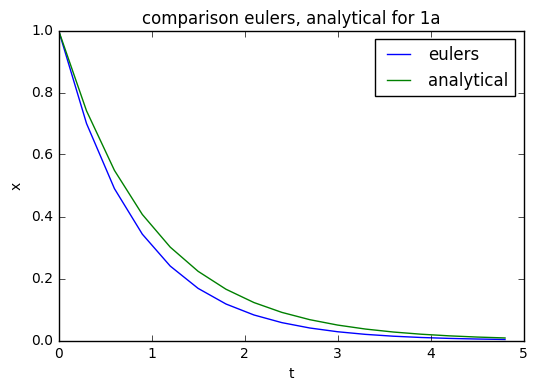

In [6]:
pt,px=euler(a,1,5,0.3)
plt.plot(pt,px, label='eulers')
plt.plot(pt,a2(np.array(pt)), label='analytical')
plt.xlabel('t')
plt.ylabel('x')
plt.title('comparison eulers, analytical for 1a')
plt.legend()

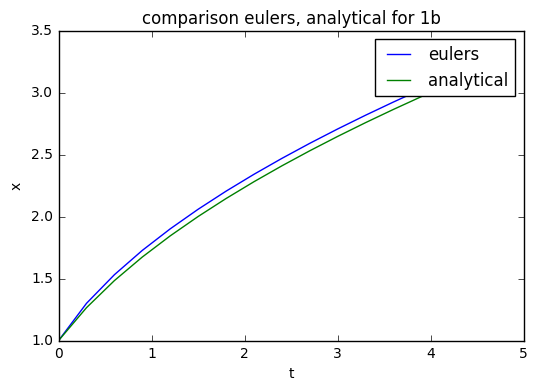

In [7]:
pt,px=euler(b,1,5,0.3)
plt.plot(pt,px, label='eulers')
plt.plot(pt,b2(np.array(pt)), label='analytical')
plt.xlabel('t')
plt.ylabel('x')
plt.title('comparison eulers, analytical for 1b')
plt.legend()

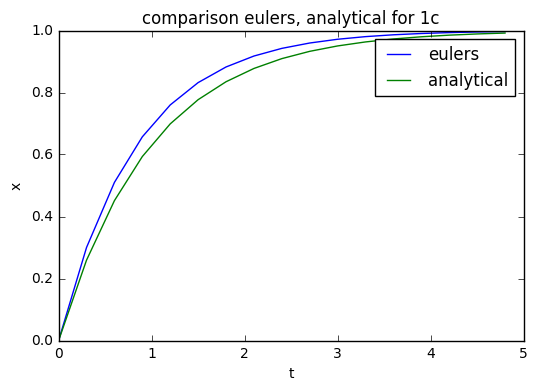

In [8]:
pt,px=euler(c,0,5,0.3)
plt.plot(pt,px, label='eulers')
plt.plot(pt,c2(np.array(pt)), label='analytical')
plt.xlabel('t')
plt.ylabel('x')
plt.title('comparison eulers, analytical for 1c')
plt.legend()

The smaller the step size, the better the Euler method approximates the ODE. Notably, the approximation is too large, if the function is concave and the approximation is too small if the function is convex.

###### c.) compare euler method results with Runge-Kutta method

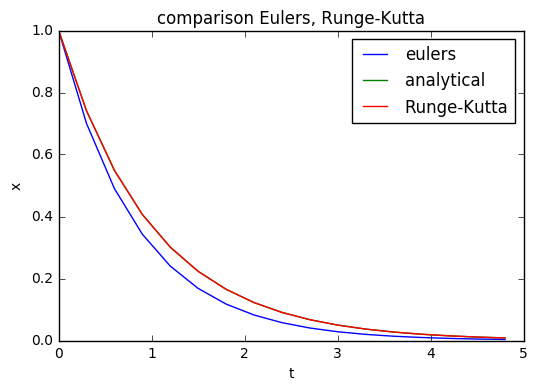

In [9]:
# just to visualise plot all 3
pt,px=euler(a,1,5,0.3)
plt.plot(pt,px, label='eulers')
plt.plot(pt,a2(np.array(pt)), label='analytical')
t=np.arange(0,5,0.3)
a3=integrate.odeint(a,1,t)
plt.plot(t,a3, label='Runge-Kutta')
plt.xlabel('t')
plt.ylabel('x')
plt.title('comparison Eulers, Runge-Kutta')
plt.legend()

#the Runge-Kutte exactly covers the analytical!

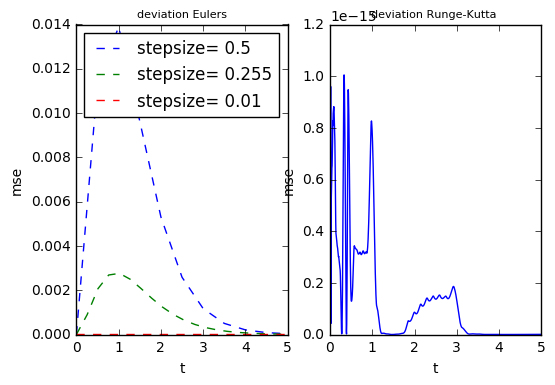

In [25]:
#multiple step sizes
for dt in np.linspace(0.5,0.01, 3):
    t,ex=euler(a,1,5,dt)
    ex=np.array(ex)
    ax=a2(np.array(t))
    plt.subplot(121)
    plt.plot(t,(ax-ex)**2,'--', label='stepsize= '+ str(dt))
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('mse')
    plt.title('deviation Eulers', fontsize=8)

plt.subplot(122)
t=np.linspace(0,5,1000)
ax=a2(np.array(t))
a3=integrate.odeint(a,1,t)
rx=integrate.odeint(a,1,np.array(t)).T[0]
plt.plot(t,(ax-rx)**2,'-')
plt.xlabel('t')
plt.ylabel('mse')  
plt.title('deviation Runge-Kutta ', fontsize=8)

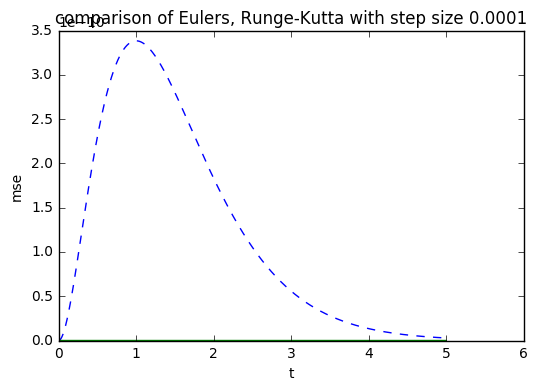

In [27]:
#comparison for step size 0.0001
t,ex=euler(a,1,5,0.0001)
ex=np.array(ex)
ax=a2(np.array(t))
a3=integrate.odeint(a,1,t)
rx=integrate.odeint(a,1,np.array(t)).T[0]

plt.plot(t,(ax-ex)**2,'--', )
plt.plot(t,(ax-rx)**2,'-')
plt.xlabel('t')
plt.ylabel('mse')
plt.title('comparison of Eulers, Runge-Kutta with step size 0.0001')
# plt.ylim([-0.0005,0.005])

The Runge-Kutta approximation fits the analytical solution much better than the Eulers method. The squared error of the Runge-Kutta approximation is orders of magnitudes lower than for the Eulers method. This is even the case, if the Eulers method uses step sizes as short as 0.0001.

### 3. Passive membrane

###### a) Use the Euler method to find V(t) as a function of time and plot the region of interest

In [2]:
R_m = 1e7  # ohm
tau_m = 10e-3  # second
E_m = -80e-3  # volt
I_0 = 1e-9  # ampere

In [3]:
def dV(V, I):
    return (-V + E_m + R_m * I) / tau_m

In [4]:
dt = 0.001  # second
t = np.arange(0, 0.1, dt)
V = np.zeros_like(t)

V[0] = E_m

for i in range(1, len(V)):
    V[i] = V[i-1] + dt * dV(V[i-1], I_0)

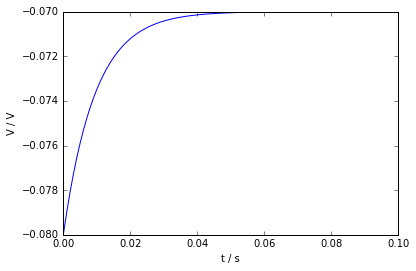

In [5]:
plt.plot(t, V)
plt.xlabel('t / s')
plt.ylabel('V / V')

###### b) plot the numerical solutions for V (t) for ν = 1 Hz, 10 Hz and 30 H

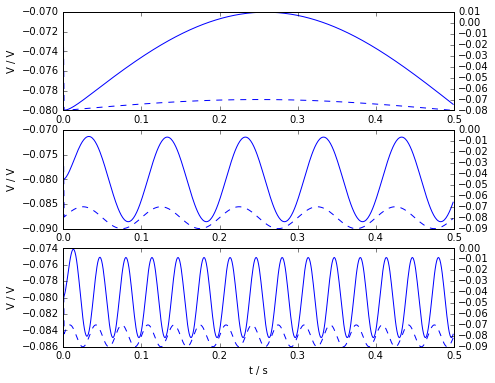

In [6]:
plt.figure(figsize=(7, 6))

for subplot, nu in enumerate([1, 10, 30]):  # herz

    dt = 0.001  # second
    t = np.arange(0, .5, dt)
    V = np.zeros_like(t)
    rescaled_voltage = np.zeros_like(t)

    V[0] = E_m

    for i in range(1, len(V)):
        I_t = I_0 * np.sin(2 * np.pi * nu * t[i])
        V[i] = V[i-1] + dt * dV(V[i-1], I_t)
        rescaled_voltage[i] = E_m + R_m * I_t
        
    plt.subplot(3, 1, subplot+1)
    plt.plot(t, V, '')
    plt.xlabel('t / s')
    plt.ylabel('V / V')

    plt.twinx()
    plt.plot(t, rescaled_voltage, '--')

###### c) make a plot of the amplitudes A of the resulting voltage oscillation versus frequencies ν in the interval [1 Hz, 100 Hz]. Make also the equivalent plot for the phase differences

In [7]:
nus = np.linspace(1, 100)  # herz
As = []
thetas = []

for nu in nus:

    dt = 0.001  # second
    t = np.arange(0, 3., dt)
    V = np.zeros_like(t)
    I = np.zeros_like(t)

    V[0] = E_m

    for i in range(1, len(V)):
        I_t = I_0 * np.sin(2 * np.pi * nu * t[i])
        I[i] = I_t
        V[i] = V[i-1] + dt * dV(V[i-1], I_t)
        
    As.append(np.max(V))
    # TODO: theta
    

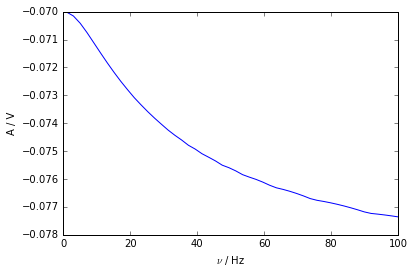

In [8]:
plt.plot(nus, As)
plt.xlabel(r'$\nu$ / Hz')
plt.ylabel('A / V')